In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [308]:
famago = pd.read_csv('../data/private/csv/fam/august.csv')
famsep = pd.read_csv('../data/private/csv/fam/september.csv')
famoct = pd.read_csv('../data/private/csv/fam/october.csv')
famago.head()

,time,sysclass,lat,lon,dir,vel,size,ttyyyxx1,ttyyyxx2,ttyyyxx3,...,maxz,meanvil,ttvil,meanprec,maxprec,year,month,day,hour,minute
0,0.0,0.0,-2.47,-61.05,-999.0,0.0,641.0,0.0,0.0,0.0,...,51.62,1.54,985.28,12.48,162.18,2014,8,1,0,0
1,0.2,2.0,-2.51,-61.15,0.0,22.2,493.0,0.0,0.0,0.0,...,49.64,1.00,491.62,8.71,118.85,2014,8,1,0,0
2,0.4,2.0,-2.43,-61.11,270.0,33.3,519.0,0.0,0.0,0.0,...,56.55,1.21,630.50,9.48,350.60,2014,8,1,0,0
3,0.6,3.0,-2.45,-61.09,243.0,24.8,556.0,0.0,0.0,0.0,...,54.00,1.00,556.31,6.41,235.26,2014,8,1,0,0
4,0.8,2.0,-2.37,-61.05,270.0,55.5,711.0,0.0,0.0,0.0,...,46.78,0.79,561.39,4.30,75.94,2014,8,1,0,0


In [309]:
ago = famago[famago['day'] >= 29]
oct = famoct[famoct['day'] <= 7]
famdf = pd.concat([ago, famsep, oct], sort=False)
famdf.head()

,time,sysclass,lat,lon,dir,vel,size,ttyyyxx1,ttyyyxx2,ttyyyxx3,...,maxz,meanvil,ttvil,meanprec,maxprec,year,month,day,hour,minute
13486,0.0,0.0,-2.57,-58.57,-999.0,0.0,49.0,0.0,0.0,0.0,...,25.35,0.25,12.01,1.18,2.72,2014,8,29,0,24
13487,0.2,1.0,-2.47,-58.63,329.0,64.8,23.0,0.0,0.0,0.0,...,23.67,0.21,4.80,1.08,2.11,2014,8,29,0,24
13488,0.4,1.0,-2.39,-58.67,333.0,49.7,26.0,0.0,0.0,0.0,...,23.67,0.22,5.61,1.21,2.09,2014,8,29,0,24
13489,0.6,1.0,-2.29,-58.71,338.0,59.8,32.0,0.0,0.0,0.0,...,27.83,0.26,8.24,1.53,3.81,2014,8,29,0,24
13490,0.8,1.0,-2.29,-58.77,270.0,33.3,13.0,0.0,0.0,0.0,...,24.28,0.23,2.94,1.41,2.16,2014,8,29,0,24


In [310]:
famdf.columns

Index(['time', 'sysclass', 'lat', 'lon', 'dir', 'vel', 'size', 'ttyyyxx1',
       'ttyyyxx2', 'ttyyyxx3', 'ttyyyxx4', 'ttyyyxx5', 'riverfrac', 'convfrac',
       'strafrac', 'meanz', 'maxz', 'meanvil', 'ttvil', 'meanprec', 'maxprec',
       'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [61]:
group = famdf.groupby(['month', 'day', 'hour', 'minute']).agg({'ttyyyxx3': 'sum', 'maxz': 'sum'})
group.head()

ttyyyxx3    maxz
month day hour minute                  
8     29  0    24           0.0  124.80
          1    24           0.0  294.43
               48           0.0   67.11
          2    12           0.0   52.92
               24           0.0   50.11

In [91]:
days = {}
for i, row in group.iterrows():
#     key =''.join(str(x) if len(str(x)) == 2 \
#                  else '0'+str(x) for x in (i[0], i[1]))
    m = str(i[0]) if len(str(i[0])) == 2 else '0'+str(i[0])
    d = str(i[1]) if len(str(i[1])) == 2 else '0'+str(i[1])
    key = '%s/%s'%(d, m)
    if not days.get(key):
        days[key] = {'maxz': 0, 'lightnings': 0}
    
    days[key]['maxz'] += row['maxz']
    days[key]['lightnings'] += row['ttyyyxx3']

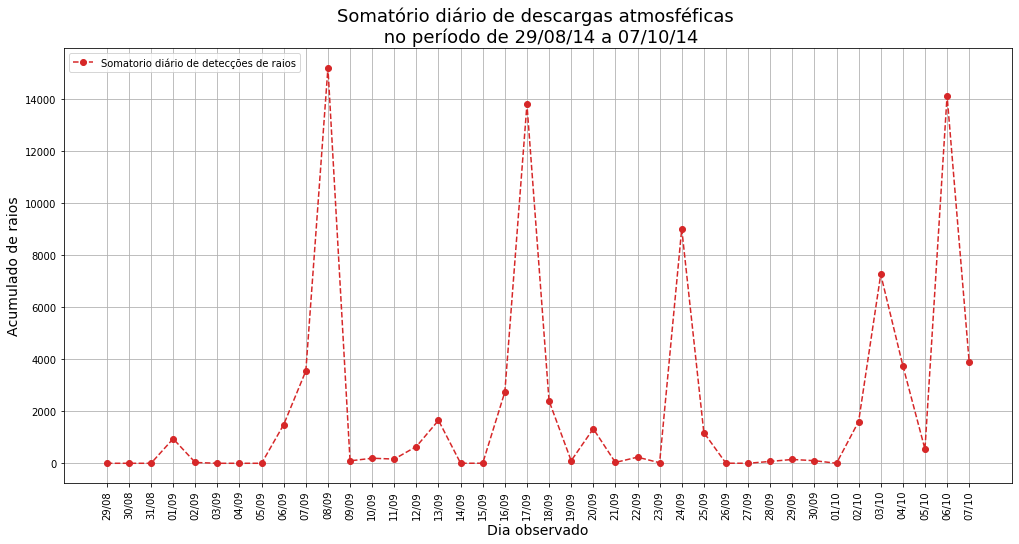

In [268]:
fig, ax = plt.subplots(figsize=(17, 8))
color = 'tab:red'

values = days.values()

x1, y1 = list(days.keys()), [x['maxz'] \
                             for x in days.values()] 
x2, y2 = list(days.keys()), [x['lightnings'] \
                             for x in days.values()]

ax.set_title('Somatório diário de descargas atmosféficas \n no período de 29/08/14 a 07/10/14', \
            fontdict={'fontsize': '18'})

color = 'tab:red'
ax.plot(x2, y2, color=color, marker='o', \
            linestyle='--', label='Somatorio diário de detecções de raios')
ax.set_xlabel('Dia observado',fontdict={'fontsize': '14'})
ax.set_ylabel('Acumulado de raios', fontdict={'fontsize': '14'})
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='y', labelcolor=color)
# fig.legend()
plt.grid()

# ax2 = ax.twinx()
# color = 'tab:gray'
# ax2.plot(x2, y2, color=color, marker='o', linestyle='--', label='Somatório diário do índice maxz')
# ax2.set_ylabel('Acumulado de maxz', color=color)
# ax2.legend(loc='upper right')

ax.legend(loc='upper left')
plt.savefig('../images/results/daily-lightnings.pdf', dpi=300, \
           bbox_inches='tight', transparent="False", pad_inches=0.1)
plt.show()

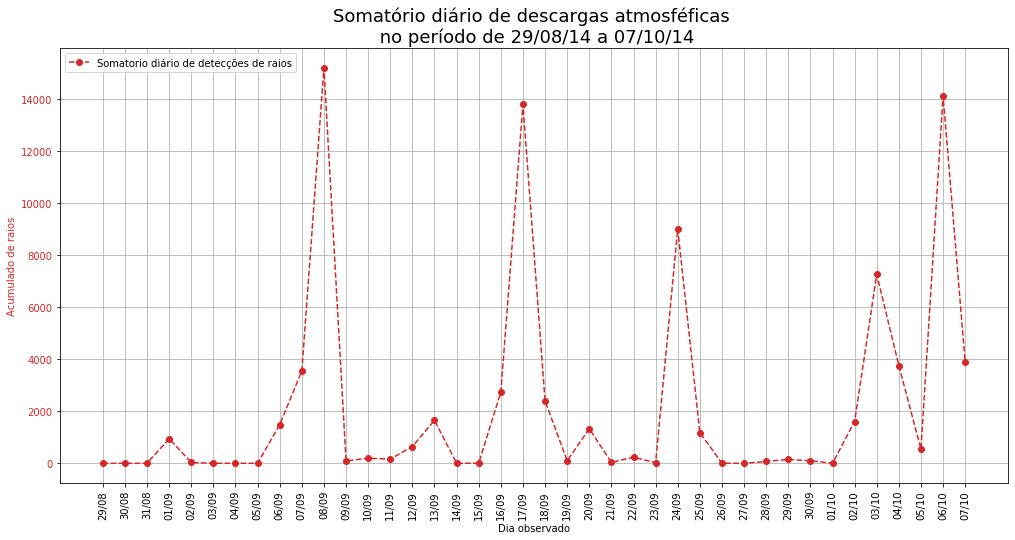

In [176]:
plt.figure(figsize=(17, 8))
color = 'tab:red'

values = days.values()

x1, y1 = list(days.keys()), [x['maxz'] \
                             for x in days.values()] 
x2, y2 = list(days.keys()), [x['lightnings'] \
                             for x in days.values()]

plt.title('Somatório diário de descargas atmosféficas \n no período de 29/08/14 a 07/10/14', \
            fontdict={'fontsize': '18'})

color = 'tab:red'
plt.plot(x2, y2, color=color, marker='o', \
            linestyle='--', label='Somatorio diário de detecções de raios')
plt.xlabel('Dia observado')
plt.ylabel('Acumulado de raios', color=color)
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', labelcolor=color)
plt.grid()

plt.legend(loc='upper left')
plt.savefig('../images/results/daily-lightnings.png', dpi=300)
plt.show()

In [191]:
# agomat = pd.read_csv('../data/private/csv/mat/august.csv')
# sepmat = pd.read_csv('../data/private/csv/mat/september.csv')
# octmat = pd.read_csv('../data/private/csv/mat/october.csv')
group = famdf.groupby(['lon', 'lat']).agg({'ttyyyxx3': 'sum'})
group.head()

ttyyyxx3
lon    lat            
-61.59 -3.21      24.0
       -3.19       0.0
       -3.17       0.0
       -3.15       0.0
       -3.13       0.0

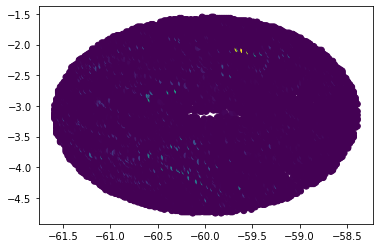

In [197]:
x, y, z = [], [], []
for i, row in group.iterrows():
    x.append(i[0])
    y.append(i[1])
    z.append(row['ttyyyxx3'])


plt.scatter(x, y, c=z)

In [207]:
it = [int(x) for x in famdf['ttyyyxx3'].values.ravel()]
len(np.unique(it))

257

In [211]:
freq = famdf.groupby('ttyyyxx3').agg({'ttyyyxx3': 'count'})

for i, row in freq.iterrows():
#     print('idx: {} = {}'.format(i, row['ttyyyxx3']))
    pass

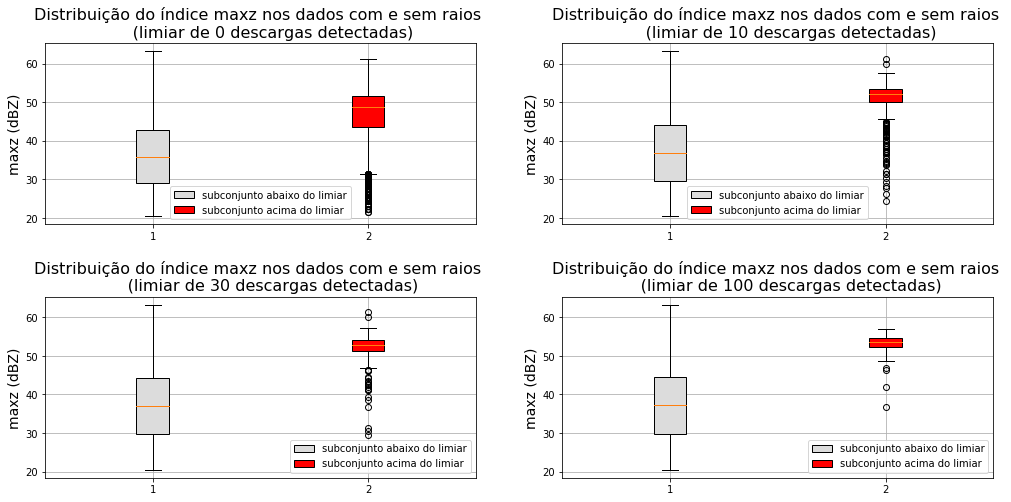

In [325]:
fig, ax = plt.subplots(2, 2, figsize=(17, 8))

threshold = 0
l, c = 0, 0
no = famdf[famdf['ttyyyxx3'] <= threshold]
yes = famdf[famdf['ttyyyxx3'] > threshold]
n1 = no['maxz'].values.ravel()
n2 = yes['maxz'].values.ravel()

boxes = ax[l, c].boxplot([n1, n2], patch_artist=True)
boxes['boxes'][0].set(facecolor='gainsboro')
boxes['boxes'][1].set(facecolor='red')
ax[l, c].set_xticks([1, 2], ['', ''])
ax[l, c].set_ylabel('maxz (dBZ)', \
          fontdict={'fontsize': '14'})
ax[l, c].set_title('Distribuição do índice maxz nos dados com e sem raios \n \
    (limiar de %s descargas detectadas)'%str(threshold), \
         fontdict={'fontsize': '16'})
ax[l, c].grid()
ax[l, c].legend([boxes['boxes'][0], boxes['boxes'][1]], \
           ['subconjunto abaixo do limiar', 'subconjunto acima do limiar'])

threshold = 10
l, c = 0, 1
no = famdf[famdf['ttyyyxx3'] <= threshold]
yes = famdf[famdf['ttyyyxx3'] > threshold]
n1 = no['maxz'].values.ravel()
n2 = yes['maxz'].values.ravel()

boxes = ax[l, c].boxplot([n1, n2], patch_artist=True)
boxes['boxes'][0].set(facecolor='gainsboro')
boxes['boxes'][1].set(facecolor='red')
ax[l, c].set_xticks([1, 2], ['', ''])
ax[l, c].set_ylabel('maxz (dBZ)', \
          fontdict={'fontsize': '14'})
ax[l, c].set_title('Distribuição do índice maxz nos dados com e sem raios \n \
    (limiar de %s descargas detectadas)'%str(threshold), \
         fontdict={'fontsize': '16'})
ax[l, c].grid()
ax[l, c].legend([boxes['boxes'][0], boxes['boxes'][1]], \
           ['subconjunto abaixo do limiar', 'subconjunto acima do limiar'])

threshold = 30
l, c = 1, 0
no = famdf[famdf['ttyyyxx3'] <= threshold]
yes = famdf[famdf['ttyyyxx3'] > threshold]
n1 = no['maxz'].values.ravel()
n2 = yes['maxz'].values.ravel()

boxes = ax[l, c].boxplot([n1, n2], patch_artist=True)
boxes['boxes'][0].set(facecolor='gainsboro')
boxes['boxes'][1].set(facecolor='red')
ax[l, c].set_xticks([1, 2], ['', ''])
ax[l, c].set_ylabel('maxz (dBZ)', \
          fontdict={'fontsize': '14'})
ax[l, c].set_title('Distribuição do índice maxz nos dados com e sem raios \n \
    (limiar de %s descargas detectadas)'%str(threshold), \
         fontdict={'fontsize': '16'})
ax[l, c].grid()
ax[l, c].legend([boxes['boxes'][0], boxes['boxes'][1]], \
           ['subconjunto abaixo do limiar', 'subconjunto acima do limiar'])


threshold = 100
l, c = 1, 1
no = famdf[famdf['ttyyyxx3'] <= threshold]
yes = famdf[famdf['ttyyyxx3'] > threshold]
n1 = no['maxz'].values.ravel()
n2 = yes['maxz'].values.ravel()

boxes = ax[l, c].boxplot([n1, n2], patch_artist=True)
boxes['boxes'][0].set(facecolor='gainsboro')
boxes['boxes'][1].set(facecolor='red')
ax[l, c].set_xticks([1, 1], ['', ''])
ax[l, c].set_ylabel('maxz (dBZ)', \
          fontdict={'fontsize': '14'})
ax[l, c].set_title('Distribuição do índice maxz nos dados com e sem raios \n \
    (limiar de %s descargas detectadas)'%str(threshold), \
         fontdict={'fontsize': '16'})
ax[l, c].grid()
ax[l, c].legend([boxes['boxes'][0], boxes['boxes'][1]], \
           ['subconjunto abaixo do limiar', 'subconjunto acima do limiar'])



plt.subplots_adjust(hspace=0.4)
# plt.xticks('off')
plt.savefig('../images/results/distribution-maxz.pdf', dpi=300, \
           bbox_inches='tight', transparent="False", pad_inches=0.1)
plt.show()

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


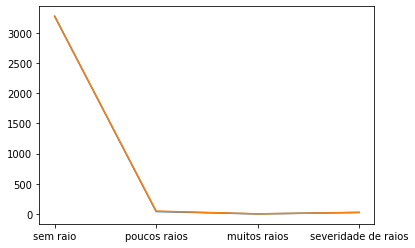

In [484]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
from IPython.display import Image  
import pickle

features = famdf[['maxz']]
labels = famdf[['labels']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.10)
cfl = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=6, min_samples_leaf=5)
cfl.fit(X_train, y_train)
y_pred = cfl.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
cs1 = {
    'sem raio': 0, 'poucos raios': 0, 
    'muitos raios': 0, 'severidade de raios': 0
}
for p, t in zip(y_pred, y_test.values.ravel()):
    if p == t:
        cs1[p] += 1

#--- random forest                
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.10)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
cfl.fit(X_train, y_train)
y_pred = cfl.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
cs2 = {
    'sem raio': 0, 'poucos raios': 0, 
    'muitos raios': 0, 'severidade de raios': 0
}

for p, t in zip(y_pred, y_test.values.ravel()):
    if p == t:
        cs2[p] += 1
    
plt.plot(x, list(cs1.values()))
plt.plot(x, list(cs2.values()))

In [425]:
features = famdf[['maxz']]
labels = famdf[['ttyyyxx3']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.15)
cfl = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=6, min_samples_leaf=5)
cfl.fit(X_train, y_train)
y_pred = cfl.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8721687060661286

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


<BarContainer object of 4 artists>

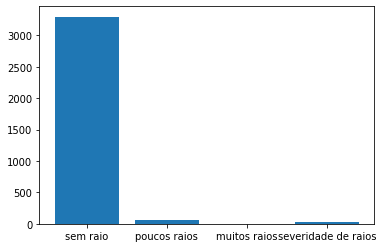

In [469]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

features = famdf[['maxz']]
labels = famdf[['labels']]
# labels = famdf[['ttyyyxx3']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.15)


rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

cfl.fit(X_train, y_train)

y_pred = cfl.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

cs2 = {
    'sem raio': 0, 'poucos raios': 0, 
    'muitos raios': 0, 'severidade de raios': 0
}

for p, t in zip(y_pred, y_test.values.ravel()):
    if p == t:
        cs2[p] += 1
    
x, y = list(cs2.keys()), list(cs2.values())

plt.bar(x, y)

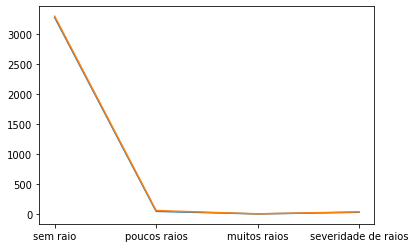

In [428]:
labels = []

for i, row in famdf.iterrows():
    if row['ttyyyxx3'] <= 0:
        labels.append('sem raio')
    elif row['ttyyyxx3'] <= 10:
        labels.append('poucos raios')
    elif row['ttyyyxx3'] <= 30:
        labels.append('muitos raios')
    else:
        labels.append('severidade de raios')
famdf['labels'] = labels

In [520]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
from IPython.display import Image  
import pickle

features = famdf[['maxz']]
labels = famdf[['ttyyyxx3']]


def decision_tree():    
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.10)
    dt = DecisionTreeClassifier(criterion = "entropy")
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    return metrics.accuracy_score(y_pred, y_test)*100

def random_forest():
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.10)
    rf = RandomForestClassifier(n_estimators=250)
    rf.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    return metrics.accuracy_score(y_pred, y_test)*100

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataC

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataC

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataC

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataC

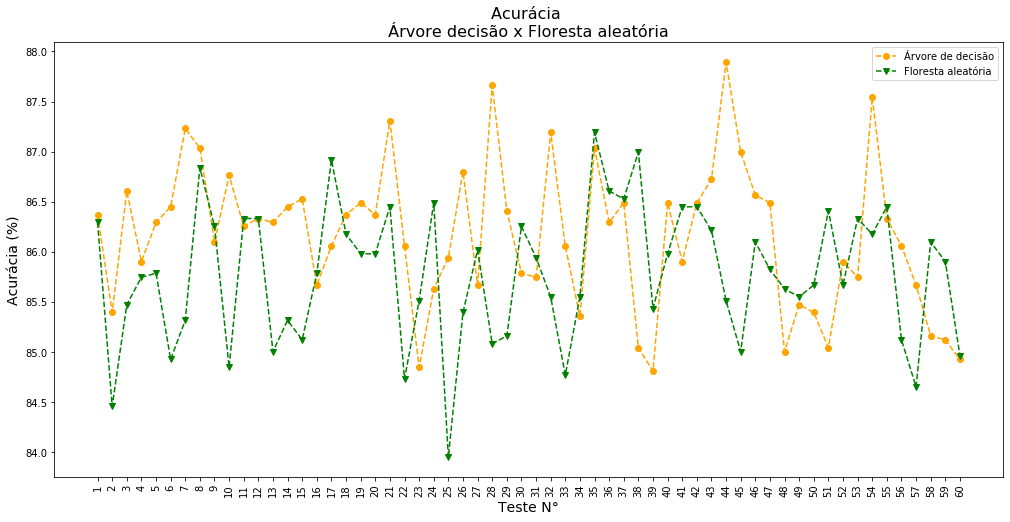

In [518]:
epocas = 60
dtc, rfc= [], []

for x in range(epocas):
    dtc.append(decision_tree())
    rfc.append(random_forest())

plt.figure(figsize=(17, 8))
plt.title('Acurácia \n Árvore decisão x Floresta aleatória ', \
          fontdict={'fontsize': '16'})
plt.ylabel('Acurácia (%)', \
          fontdict={'fontsize': '14'})
plt.xlabel('Teste N°', \
          fontdict={'fontsize': '14'})
plt.xticks(np.arange(epocas), np.arange(1, epocas+1), rotation=90)
plt.plot(dtc, color='orange', marker='o', linestyle='--', label='Árvore de decisão')
plt.plot(rfc, color='green', marker='v', linestyle='--', label='Floresta aleatória')
plt.legend()

plt.savefig('../images/results/acurracy3.pdf', dpi=300, \
           bbox_inches='tight', transparent="False", pad_inches=0.1)
plt.show()

In [541]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.10)
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [542]:
df1 = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test.values.ravel()})
df1.head()

,y_pred,y_test
0,0.0,8.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


In [543]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.10)
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train, y_train)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [544]:
df2 = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test.values.ravel()})
df2.head()

,y_pred,y_test
0,0.0,11.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [545]:
d1 = {'l1': 0, 'l2': 0, 'l3': 0, 'l4': 0}

for i, row in df1.iterrows():
    if row['y_pred'] == row['y_test']:
        if row['y_pred'] <= 0:
            d1['l1'] += 1
        elif row['y_pred'] <= 10:
            d1['l2'] += 1
        elif row['y_pred'] <= 30:
            df['l3'] += 1
        else:
            d1['l4'] += 1

In [546]:
d1

{'l1': 2205, 'l2': 5, 'l3': 0, 'l4': 0}

In [547]:
d2 = {'l1': 0, 'l2': 0, 'l3': 0, 'l4': 0}

for i, row in df2.iterrows():
    if row['y_pred'] == row['y_test']:
        if row['y_pred'] <= 0:
            d2['l1'] += 1
        elif row['y_pred'] <= 10:
            d2['l2'] += 1
        elif row['y_pred'] <= 30:
            d2['l3'] += 1
        else:
            d2['l4'] += 1

In [540]:
d2

{'l1': 2210, 'l2': 3, 'l3': 0, 'l4': 0}

In [556]:
group = famdf.groupby('ttyyyxx3').agg({'ttyyyxx3': 'count'})
group.head()

,ttyyyxx3
ttyyyxx3,
0.0,22205
1.0,1134
2.0,453
3.0,249
4.0,194


In [557]:

for i, row in group.head(15).iterrows():
    print(i, row)

0.0 ttyyyxx3    22205
Name: 0.0, dtype: int64
1.0 ttyyyxx3    1134
Name: 1.0, dtype: int64
2.0 ttyyyxx3    453
Name: 2.0, dtype: int64
3.0 ttyyyxx3    249
Name: 3.0, dtype: int64
4.0 ttyyyxx3    194
Name: 4.0, dtype: int64
5.0 ttyyyxx3    134
Name: 5.0, dtype: int64
6.0 ttyyyxx3    87
Name: 6.0, dtype: int64
7.0 ttyyyxx3    74
Name: 7.0, dtype: int64
8.0 ttyyyxx3    88
Name: 8.0, dtype: int64
9.0 ttyyyxx3    58
Name: 9.0, dtype: int64
10.0 ttyyyxx3    43
Name: 10.0, dtype: int64
11.0 ttyyyxx3    50
Name: 11.0, dtype: int64
12.0 ttyyyxx3    38
Name: 12.0, dtype: int64
13.0 ttyyyxx3    28
Name: 13.0, dtype: int64
14.0 ttyyyxx3    29
Name: 14.0, dtype: int64


In [590]:
group.count()

ttyyyxx3    257
dtype: int64

In [591]:
famdf.count()

time         25603
sysclass     25603
lat          25603
lon          25603
dir          25603
vel          25603
size         25603
ttyyyxx1     25603
ttyyyxx2     25603
ttyyyxx3     25603
ttyyyxx4     25603
ttyyyxx5     25603
riverfrac    25603
convfrac     25603
strafrac     25603
meanz        25603
maxz         25603
meanvil      25603
ttvil        25603
meanprec     25603
maxprec      25603
year         25603
month        25603
day          25603
hour         25603
minute       25603
labels       25603
dtype: int64

In [607]:
group[6:].sum()

ttyyyxx3    1234
dtype: int64

In [608]:
(1234*100)/25603

4.819747685818069

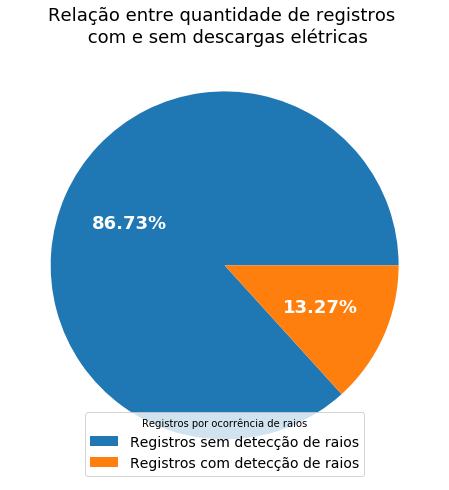

In [640]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%".format(pct, absolute)

lines = list(group.head(1).values.ravel())
lines.append(group.values.sum()-sum(lines))

plt.figure(figsize=(17, 8))
wedges, texts, autotexts = plt.pie(lines, autopct=lambda pct: func(pct, lines),
                                  textprops=dict(color="w"))
plt.legend(['Registros sem detecção de raios', \
            'Registros com detecção de raios'], \
           title='Registros por ocorrência de raios', \
          loc="lower center", fontsize=14)
plt.setp(autotexts, size=18, weight="bold")

plt.title('Relação entre quantidade de registros \n com e sem descargas elétricas', fontdict={'fontsize':18})
plt.savefig('../images/results/relation.pdf', dpi=300, \
           bbox_inches='tight', transparent="False", pad_inches=0.1)

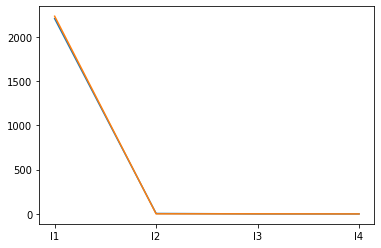

In [553]:
x1, y1 = list(d1.keys()), list(d1.values())
x2, y2 = list(d2.keys()), list(d2.values())

plt.plot(x1, y1)
plt.plot(x2, y2)

([<matplotlib.axis.XTick at 0x7fb0a6dca160>,
 <a list of 5 Text xticklabel objects>)

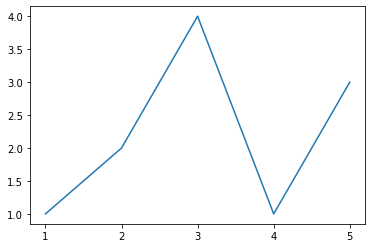

In [510]:
plt.plot([1, 2, 4, 1, 3])
plt.xticks(np.arange(5), np.arange(1, 5+1))

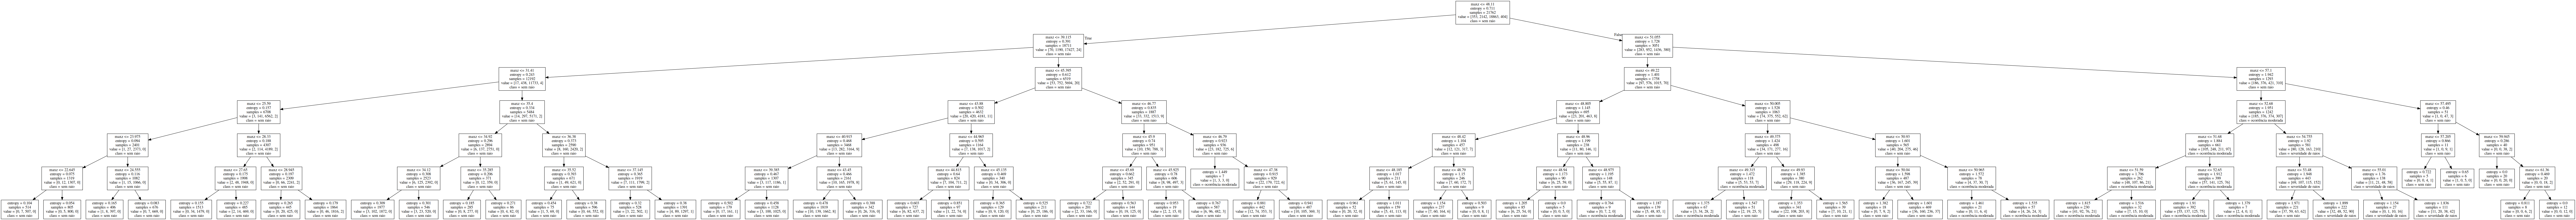

In [422]:
dot_data = tree.export_graphviz(cfl, out_file=None, \
                                feature_names=famdf[['maxz']].columns.values, \
                               class_names=np.unique(labels))
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())